In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
sns.set(color_codes=True)

In [4]:
np.random.seed(sum(map(ord,"distributions")))

## Plotting univariate distributions
using the seaborn distplot()
by default this draws the histogram and fit the kernel density estimate (KDE)

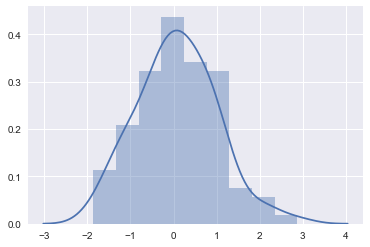

In [5]:
x=np.random.normal(size=100)
sns.distplot(x);

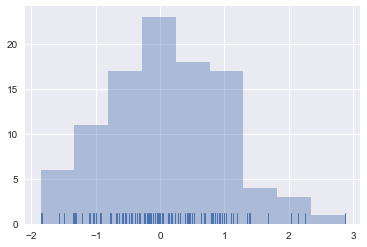

In [6]:
sns.distplot(x,kde=False,rug=True);

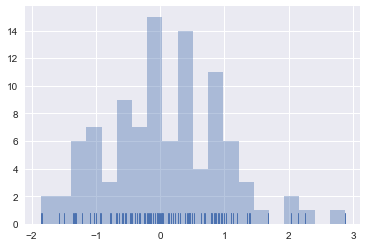

In [7]:
sns.distplot(x,bins=20,kde=False,rug=True);

# Kernel density estimation

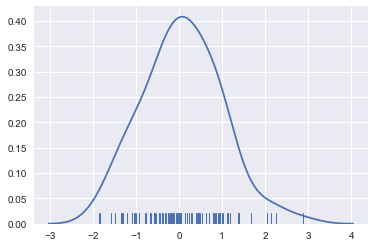

In [8]:
sns.distplot(x,hist=False,rug=True);

Drawing a KDE is more computationally involved than histogram

What happens is that each observation is first replaced with a normal (Gaussian) curve centered at that value:

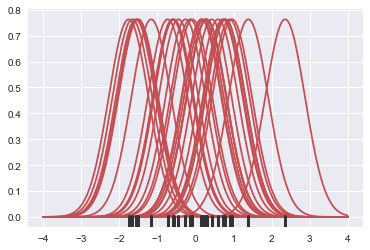

In [9]:
x=np.random.normal(0,1,size=30)
bandwidth=1.06*x.std()*x.size**(-1/5.)
support=np.linspace(-4,4,200)

kernels=[]
for x_i in x:
    kernel=stats.norm(x_i,bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support,kernel,color="r")

sns.rugplot(x,color=".2",linewidth=3);

Next, these curves are summed to compute the value of the density at each point in the support grid. The resulting curve is then normalized so that the area under it is equal to 1:

In [10]:
len(kernels)

30

In [11]:
density=np.sum(kernels,axis=0)

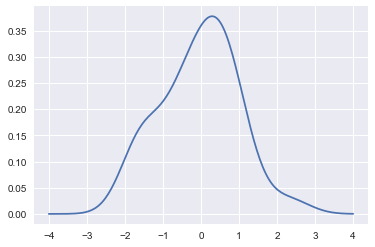

In [12]:
density/=integrate.trapz(density,support)
plt.plot(support,density);

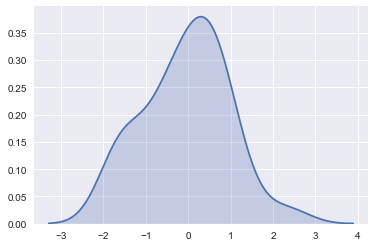

In [13]:
sns.kdeplot(x,shade=True)


The bandwidth (bw) parameter of the KDE controls how tightly the estimation is fit to the data, much like the bin size in a histogram. It corresponds to the width of the kernels we plotted above. The default behavior tries to guess a good value using a common reference rule, but it may be helpful to try larger or smaller values:

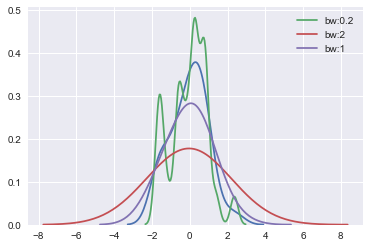

In [14]:
sns.kdeplot(x)
sns.kdeplot(x,bw=.2,label="bw:0.2")
sns.kdeplot(x,bw=2,label="bw:2")
sns.kdeplot(x,bw=1,label="bw:1")
plt.legend();

As you can see above, the nature of the Gaussian KDE process means that estimation extends past the largest and smallest values in the dataset. It’s possible to control how far past the extreme values the curve is drawn with the cut parameter; however, this only influences how the curve is drawn and not how it is fit:

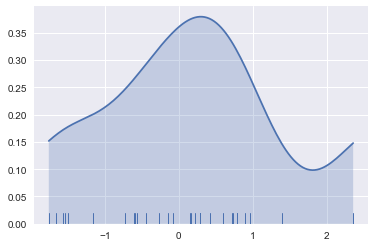

In [15]:
sns.kdeplot(x,shade=True,cut=0)
sns.rugplot(x);

# Fitting parametric distributions

You can also use distplot() to fit a parametric distribution to a dataset and visually evaluate how closely it corresponds to the observed data:

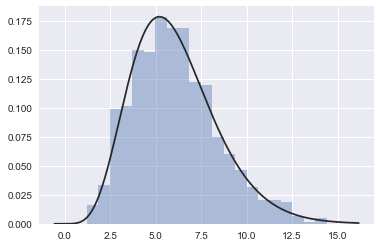

In [16]:
x=np.random.gamma(6,size=1000)
sns.distplot(x,kde=False,fit=stats.gamma);

# Plotting bivariate distributions
It can also be useful to visualize a bivariate distribution of two variables. The easiest way to do this in seaborn is to just use the jointplot() function, which creates a multi-panel figure that shows both the bivariate (or joint) relationship between two variables along with the univariate (or marginal) distribution of each on separate axes.

In [17]:
mean,cov=[0, 1], [(1, .5), (.5, 1)]
data=np.random.multivariate_normal(mean,cov,200)
df=pd.DataFrame(data,columns=["x","y"])

In [18]:
df.describe()

,x,y
count,200.000000,200.000000
mean,0.028760,1.040163
std,1.004107,1.017957
min,-2.462554,-1.252643
25%,-0.619382,0.281287
50%,0.002581,1.080256
75%,0.660109,1.827425
max,2.789612,3.309192


In [19]:
df.dtypes
# It is dtypes goddamn it

x    float64
y    float64
dtype: object

# Scatterplots
The most familiar way to visualize a bivariate distribution is a scatterplot. This can be drawn with x,y values. 

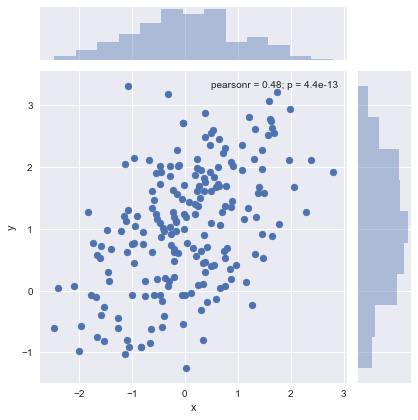

In [20]:
sns.jointplot(x="x",y="y",data=df)

## Hexbin plots
The bivariate analogue of a histogram is a hexbin plot. It shows the counts of observations that fall within hexagonal bins. This works best with relatively large datasets.

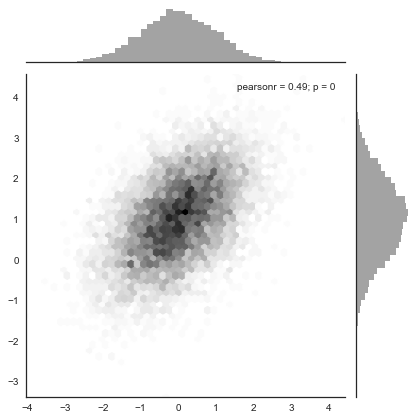

In [21]:
x,y=np.random.multivariate_normal(mean,cov,10000).T
with sns.axes_style("white"):
    sns.jointplot(x=x,y=y,kind="hex",color="k")

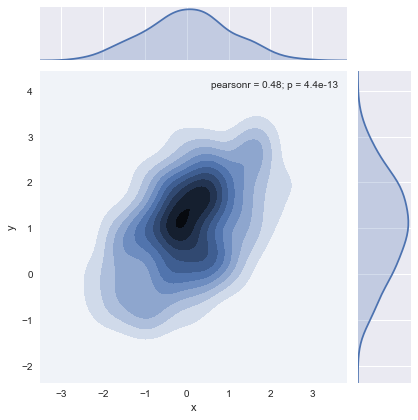

In [22]:
sns.jointplot(x="x",y="y",data=df,kind='kde');

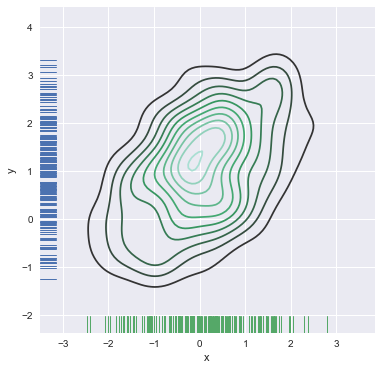

In [24]:
f, ax=plt.subplots(figsize=(6,6))
sns.kdeplot(df.x,df.y,ax=ax)
sns.rugplot(df.x,color="g",ax=ax)
sns.rugplot(df.y,vertical=True,ax=ax)

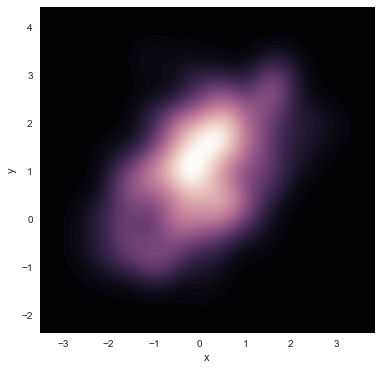

In [27]:
f,ax=plt.subplots(figsize=(6,6))
cmap=sns.cubehelix_palette(as_cmap=True,dark=0,light=1,reverse=True)
sns.kdeplot(df.x,df.y,cmap=cmap,n_levels=60,shade=True);

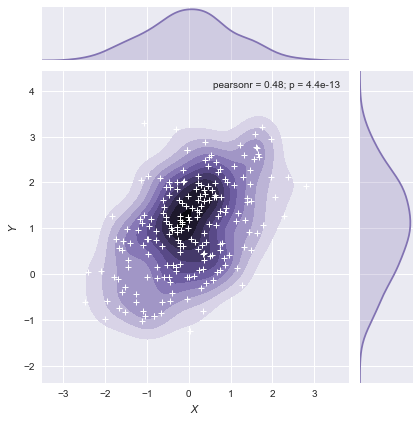

In [28]:
g=sns.jointplot(x="x",y="y",data=df,kind="kde",color="m")
g.plot_joint(plt.scatter,c="w",s=30,linewidth=1,marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$","$Y$");

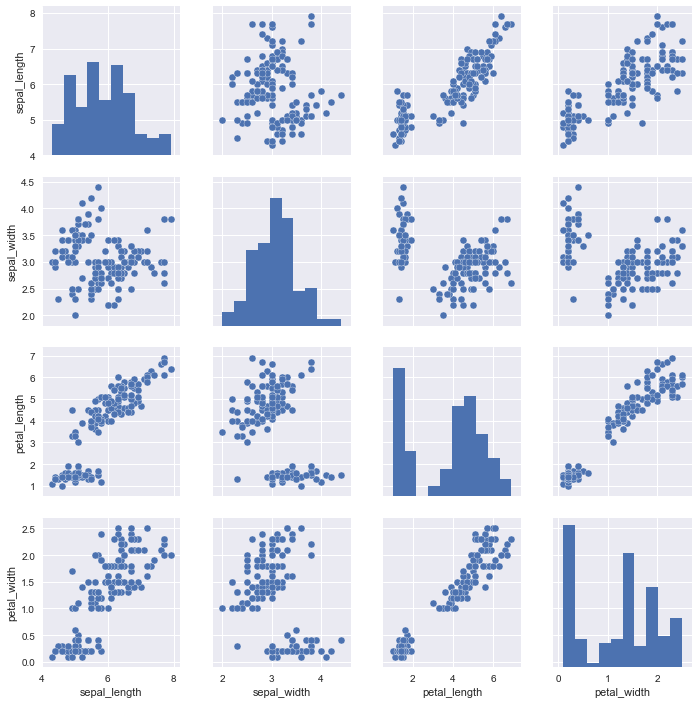

In [29]:
# Visualizing pairwise relationships in a dataset
iris=sns.load_dataset("iris")
sns.pairplot(iris);

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
/anaconda/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


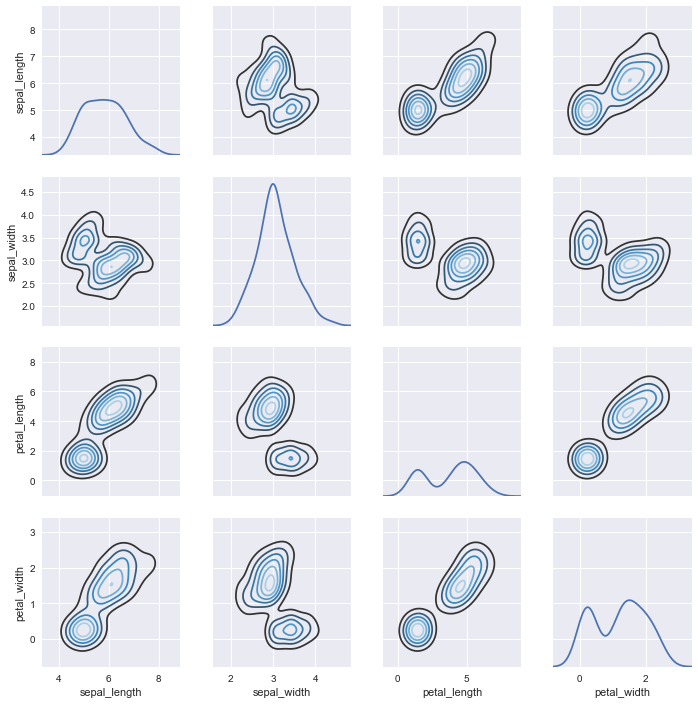

In [30]:
g=sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot,cmap="Blues_d",n_levels=6);